In [2]:
import ccxt
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab
from datetime import datetime
import time
# import seaborn as sns

import pickle
print(ccxt.exchanges) # print a list of all available exchange classes

['_1broker', '_1btcxe', 'anxpro', 'binance', 'bit2c', 'bitbay', 'bitbays', 'bitcoincoid', 'bitfinex', 'bitflyer', 'bitlish', 'bitmarket', 'bitmex', 'bitso', 'bitstamp', 'bittrex', 'bl3p', 'btcchina', 'btce', 'btcexchange', 'btcmarkets', 'btctradeua', 'btcturk', 'btcx', 'bter', 'bxinth', 'ccex', 'cex', 'chbtc', 'chilebit', 'coincheck', 'coinfloor', 'coingi', 'coinmarketcap', 'coinmate', 'coinsecure', 'coinspot', 'cryptopia', 'dsx', 'exmo', 'flowbtc', 'foxbit', 'fybse', 'fybsg', 'gatecoin', 'gdax', 'gemini', 'hitbtc', 'huobi', 'itbit', 'jubi', 'kraken', 'lakebtc', 'livecoin', 'liqui', 'luno', 'mercado', 'okcoincny', 'okcoinusd', 'okex', 'paymium', 'poloniex', 'quadrigacx', 'quoine', 'southxchange', 'surbitcoin', 'therock', 'urdubit', 'vaultoro', 'vbtc', 'virwox', 'xbtce', 'yobit', 'yunbi', 'zaif']


In [2]:
# quoine = ccxt.quoine()
# quoine.fetchTrades("BTC/JPY")

In [3]:
def create_df_trade_quoine(trade_dict, csv_name):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append([csv_name,trade["id"],trade["created_at"],trade["quantity"],trade["taker_side"],trade["price"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=[csv_name,"id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv(csv_name+datetime.now().strftime('%Y-%m-%d')+".csv")

In [9]:
quoine = ccxt.quoine()
trade_dict={}
trades=quoine.fetchTrades("BTC/JPY")["models"]
for trade in trades:
    trade_dict[trade["id"]] = trade

In [6]:
time.sleep(3)

In [ ]:
i = 0
trade_dict={}
quoine = ccxt.quoine()
name = "quoine"
sleep_time = 1
while True:
#     if sleep_time > 1:
    time.sleep(sleep_time) # quoineはおこられる
    try:
        
        trades=quoine.fetchTrades("BTC/JPY")["models"]
        for trade in trades:
            trade_dict[trade["id"]] = trade
        #     print(trade)
        #     trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
        if sleep_time>1:
            sleep_time -= 1
        i += 1
    except Exception as e: 
        print(e)
        print(sleep_time)
        print(trades)
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to access API')
    
        sleep_time = sleep_time + 1
    #     書き込み
    try:
        if i %10 == 0:
            print(i)
            create_df_trade_quoine(trade_dict, name)
            with open(name+'_log.pickle', mode='wb') as f:
                pickle.dump(trade_dict, f)
            # TODO:trade_dictが重そうやったらtrade_dict,df_tradeを初期化する
    except Exception as e: 
        print(e)
        print('Failed to write')
        with open(name+"_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to write')

10


/home/take/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


20
30
40
50
'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte
1
[{'id': 10084709, 'taker_side': 'sell', 'created_at': 1504067657, 'price': '507729.23', 'quantity': '0.02'}, {'id': 10084708, 'taker_side': 'buy', 'created_at': 1504067597, 'price': '508970.0', 'quantity': '0.28402'}, {'id': 10084707, 'taker_side': 'buy', 'created_at': 1504067597, 'price': '508969.99', 'quantity': '0.3624'}, {'id': 10084706, 'taker_side': 'buy', 'created_at': 1504067589, 'price': '508970.0', 'quantity': '2.0'}, {'id': 10084705, 'taker_side': 'buy', 'created_at': 1504067522, 'price': '508782.99', 'quantity': '1.0'}, {'id': 10084703, 'taker_side': 'sell', 'created_at': 1504067471, 'price': '507000.0', 'quantity': '0.0112'}, {'id': 10084702, 'taker_side': 'buy', 'created_at': 1504067468, 'price': '508876.0', 'quantity': '0.2498'}, {'id': 10084701, 'taker_side': 'buy', 'created_at': 1504067468, 'price': '508876.0', 'quantity': '1.1'}, {'id': 10084700, 'taker_side': 'buy', 'created_at': 150

In [5]:
a

NameError: name 'a' is not defined

In [17]:
trade_dict

{10047179: {'created_at': 1503729876,
  'id': 10047179,
  'price': '474126.95',
  'quantity': '0.1',
  'taker_side': 'buy'},
 10047180: {'created_at': 1503729908,
  'id': 10047180,
  'price': '474126.96',
  'quantity': '0.05786',
  'taker_side': 'buy'},
 10047181: {'created_at': 1503729908,
  'id': 10047181,
  'price': '474126.96',
  'quantity': '0.04214',
  'taker_side': 'buy'},
 10047182: {'created_at': 1503729938,
  'id': 10047182,
  'price': '474126.96',
  'quantity': '0.05786',
  'taker_side': 'buy'},
 10047183: {'created_at': 1503729938,
  'id': 10047183,
  'price': '474368.91',
  'quantity': '0.042',
  'taker_side': 'buy'},
 10047184: {'created_at': 1503729972,
  'id': 10047184,
  'price': '474175.54414',
  'quantity': '0.4966',
  'taker_side': 'sell'},
 10047185: {'created_at': 1503730060,
  'id': 10047185,
  'price': '474368.92',
  'quantity': '0.1',
  'taker_side': 'buy'},
 10047186: {'created_at': 1503730066,
  'id': 10047186,
  'price': '474365.31906',
  'quantity': '0.4964

In [18]:
dictlist = []
for key, value in trade_dict.items():
    dictlist.append(value)

In [22]:
dictlist

[{'created_at': 1503729876,
  'id': 10047179,
  'price': '474126.95',
  'quantity': '0.1',
  'taker_side': 'buy'},
 {'created_at': 1503729908,
  'id': 10047180,
  'price': '474126.96',
  'quantity': '0.05786',
  'taker_side': 'buy'},
 {'created_at': 1503729908,
  'id': 10047181,
  'price': '474126.96',
  'quantity': '0.04214',
  'taker_side': 'buy'},
 {'created_at': 1503729938,
  'id': 10047182,
  'price': '474126.96',
  'quantity': '0.05786',
  'taker_side': 'buy'},
 {'created_at': 1503729938,
  'id': 10047183,
  'price': '474368.91',
  'quantity': '0.042',
  'taker_side': 'buy'},
 {'created_at': 1503729972,
  'id': 10047184,
  'price': '474175.54414',
  'quantity': '0.4966',
  'taker_side': 'sell'},
 {'created_at': 1503730060,
  'id': 10047185,
  'price': '474368.92',
  'quantity': '0.1',
  'taker_side': 'buy'},
 {'created_at': 1503730066,
  'id': 10047186,
  'price': '474365.31906',
  'quantity': '0.4964',
  'taker_side': 'buy'},
 {'created_at': 1503730154,
  'id': 10047187,
  'pric

In [23]:
trade_list = []
for key, trade in trade_dict.items():
    trade_list.append(["quoine",trade["id"],trade["created_at"],trade["quantity"],trade["taker_side"],trade["price"]])
df_trade=pd.DataFrame(trade_list)
df_trade.columns=["quoine","id","created_at","amount","order_type","rate"]
df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

df_trade.index=df_trade["created_at"]
df_trade=df_trade.sort_values('created_at')
df_trade_amount=df_trade[["amount"]]

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [24]:
df_trade.head()

,quoine,id,created_at,amount,order_type,rate
created_at,,,,,,
1970-01-01 00:00:01.503729876,quoine,10047179,1970-01-01 00:00:01.503729876,0.10000,buy,474126.95
1970-01-01 00:00:01.503729908,quoine,10047180,1970-01-01 00:00:01.503729908,0.05786,buy,474126.96
1970-01-01 00:00:01.503729908,quoine,10047181,1970-01-01 00:00:01.503729908,0.04214,buy,474126.96
1970-01-01 00:00:01.503729938,quoine,10047182,1970-01-01 00:00:01.503729938,0.05786,buy,474126.96
1970-01-01 00:00:01.503729938,quoine,10047183,1970-01-01 00:00:01.503729938,0.04200,buy,474368.91


In [26]:
df_summary = df_trade_amount.groupby(pd.TimeGrouper(freq="min")).aggregate(np.sum)[1:]
df_summary.head()

,amount
created_at,


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

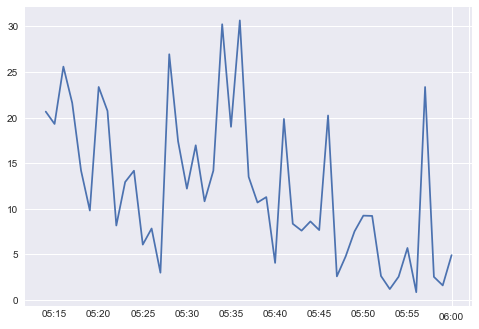

In [31]:
df_summary['amount'].plot()

In [3]:
print(hitbtc.id, hitbtc_markets)
print(bitmex.id, bitmex.load_markets())
print(huobi.id, huobi.load_markets())

print(hitbtc.fetch_order_book(hitbtc.symbols[0]))
print(bitmex.fetch_ticker('BTC/USD'))
print(huobi.fetch_trades('LTC/CNY'))

print(exmo.fetch_balance())

# sell one BTC/USD for market price and receive $ right now
print(exmo.id, exmo.create_market_sell_order('BTC/USD', 1))

# limit buy BTC/EUR, you pay €2500 and receive 1 BTC when the order is closed
print(exmo.id, exmo.create_limit_buy_order('BTC/EUR', 1, 2500.00))

# pass/redefine custom exchange-specific order params: type, amount, price, flags, etc...
kraken.create_market_buy_order('BTC/USD', 1, {'trading_agreement': 'agree'})


hitbtc <coroutine object Exchange.load_markets at 0x104ae67d8>
bitmex <coroutine object Exchange.load_markets at 0x104ae6830>
huobi <coroutine object Exchange.load_markets at 0x1044117d8>


/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: coroutine 'Exchange.load_markets' was never awaited
/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:13: RuntimeWarning: coroutine 'Exchange.load_markets' was never awaited


TypeError: 'NoneType' object is not subscriptable